<a href="https://colab.research.google.com/github/lwa01/229352-STAT-LEARING-FOR-DATA-SCI-2/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [122]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("https://donlapark.pages.dev/229352/heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [123]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [124]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [125]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

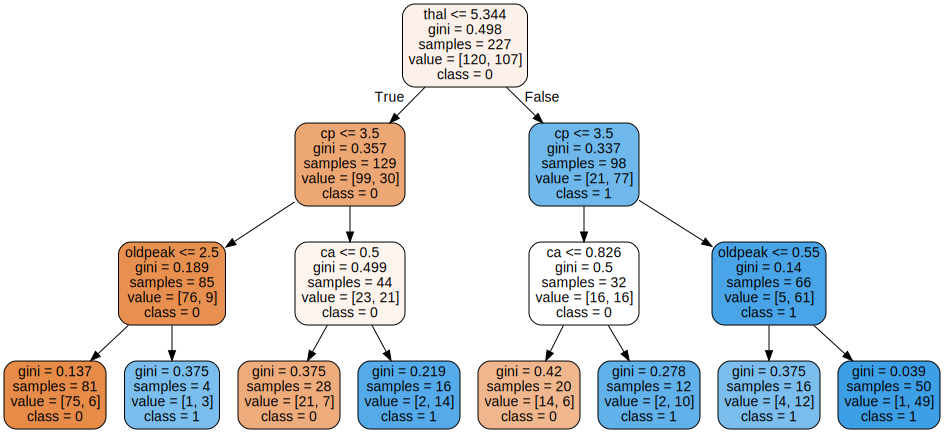

In [126]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [127]:
from sklearn.metrics import classification_report
ypred = gridcv.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.74      0.78      0.76        32

    accuracy                           0.79        76
   macro avg       0.78      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [128]:
clf = DecisionTreeClassifier()

bagget_tree = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0], max_features=5)
bagget_tree.fit(X_train, y_train)

ypred = bagget_tree.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.72      0.81      0.76        32

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [129]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

ypred = rf.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.68      0.81      0.74        32

    accuracy                           0.76        76
   macro avg       0.76      0.77      0.76        76
weighted avg       0.78      0.76      0.76        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [114]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'] }


dt_clf = DecisionTreeClassifier()


grid_search_dt = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    scoring=['f1_macro', 'accuracy'],
    refit='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(X_train, y_train)

print("GridSearchCV fitting complete.")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
GridSearchCV fitting complete.


In [115]:
from sklearn.metrics import classification_report
best_model = grid_search_dt.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Classification Report for Best Decision Tree Model:\n")
print(classification_report(y_test, y_pred_best))

Classification Report for Best Decision Tree Model:

              precision    recall  f1-score   support

           0       0.71      0.66      0.68        38
           1       0.68      0.74      0.71        38

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.70        76
weighted avg       0.70      0.70      0.70        76



In [116]:
param_grid_bagging = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'estimator__max_depth': [3, 5, 7]
}

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier())

grid_search_bagging = GridSearchCV(
    estimator=bagging_clf,
    param_grid=param_grid_bagging,
    scoring=['f1_macro', 'accuracy'],
    refit='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_bagging.fit(X_train, y_train)

print("GridSearchCV for BaggingClassifier fitting complete.")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
GridSearchCV for BaggingClassifier fitting complete.


In [117]:
from sklearn.metrics import classification_report

best_bagging_model = grid_search_bagging.best_estimator_
y_pred_bagging_best = best_bagging_model.predict(X_test)
print("Classification Report for Best Bagging Classifier Model:\n")
print(classification_report(y_test, y_pred_bagging_best))

Classification Report for Best Bagging Classifier Model:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        38
           1       0.91      0.79      0.85        38

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.85        76
weighted avg       0.86      0.86      0.85        76



In [118]:
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_features': [0.5, 0.7, 'sqrt'],
                 'max_depth': [10, 20, 30, None],
                 'min_samples_leaf': [1, 2, 4]  }

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid_rf,
    scoring=['f1_macro', 'accuracy'],
    refit='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

print("GridSearchCV for RandomForestClassifier fitting complete.")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
GridSearchCV for RandomForestClassifier fitting complete.


In [119]:
from sklearn.metrics import classification_report
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)
print("Classification Report for Best Random Forest Model:\n")
print(classification_report(y_test, y_pred_rf_best))

Classification Report for Best Random Forest Model:

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        38
           1       0.91      0.76      0.83        38

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



In [120]:
print("--- Best Decision Tree Model ---")
print("Best parameters:", grid_search_dt.best_params_)
print("Best f1_macro score (CV):", grid_search_dt.best_score_)

dt_accuracy_index = grid_search_dt.cv_results_['rank_test_f1_macro'].argmin()
dt_accuracy_cv = grid_search_dt.cv_results_['mean_test_accuracy'][dt_accuracy_index]
print("Accuracy (CV) at best f1_macro:", dt_accuracy_cv)
print("Test set f1_macro:", classification_report(y_test, y_pred_dt_best, output_dict=True)['macro avg']['f1-score'])
print("Test set accuracy:", classification_report(y_test, y_pred_dt_best, output_dict=True)['accuracy'])

print("\n--- Best Bagged Decision Trees Model ---")
print("Best parameters:", grid_search_bagging.best_params_)
print("Best f1_macro score (CV):", grid_search_bagging.best_score_)

bagging_accuracy_index = grid_search_bagging.cv_results_['rank_test_f1_macro'].argmin()
bagging_accuracy_cv = grid_search_bagging.cv_results_['mean_test_accuracy'][bagging_accuracy_index]
print("Accuracy (CV) at best f1_macro:", bagging_accuracy_cv)
print("Test set f1_macro:", classification_report(y_test, y_pred_bagging_best, output_dict=True)['macro avg']['f1-score'])
print("Test set accuracy:", classification_report(y_test, y_pred_bagging_best, output_dict=True)['accuracy'])

print("\n--- Best Random Forest Model ---")
print("Best parameters:", grid_search_rf.best_params_)
print("Best f1_macro score (CV):", grid_search_rf.best_score_)

rf_accuracy_index = grid_search_rf.cv_results_['rank_test_f1_macro'].argmin()
rf_accuracy_cv = grid_search_rf.cv_results_['mean_test_accuracy'][rf_accuracy_index]
print("Accuracy (CV) at best f1_macro:", rf_accuracy_cv)
print("Test set f1_macro:", classification_report(y_test, y_pred_rf_best, output_dict=True)['macro avg']['f1-score'])
print("Test set accuracy:", classification_report(y_test, y_pred_rf_best, output_dict=True)['accuracy'])


--- Best Decision Tree Model ---
Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best f1_macro score (CV): 0.7936957894803222
Accuracy (CV) at best f1_macro: 0.7976811594202899
Test set f1_macro: 0.5296198054818745
Test set accuracy: 0.5394736842105263

--- Best Bagged Decision Trees Model ---
Best parameters: {'estimator__max_depth': 3, 'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 200}
Best f1_macro score (CV): 0.8361754517560515
Accuracy (CV) at best f1_macro: 0.8419323671497585
Test set f1_macro: 0.8546339766997044
Test set accuracy: 0.8552631578947368

--- Best Random Forest Model ---
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50}
Best f1_macro score (CV): 0.8361743109831344
Accuracy (CV) at best f1_macro: 0.8419323671497585
Test set f1_macro: 0.8411149825783972
Test set accuracy: 0.8421052631578947


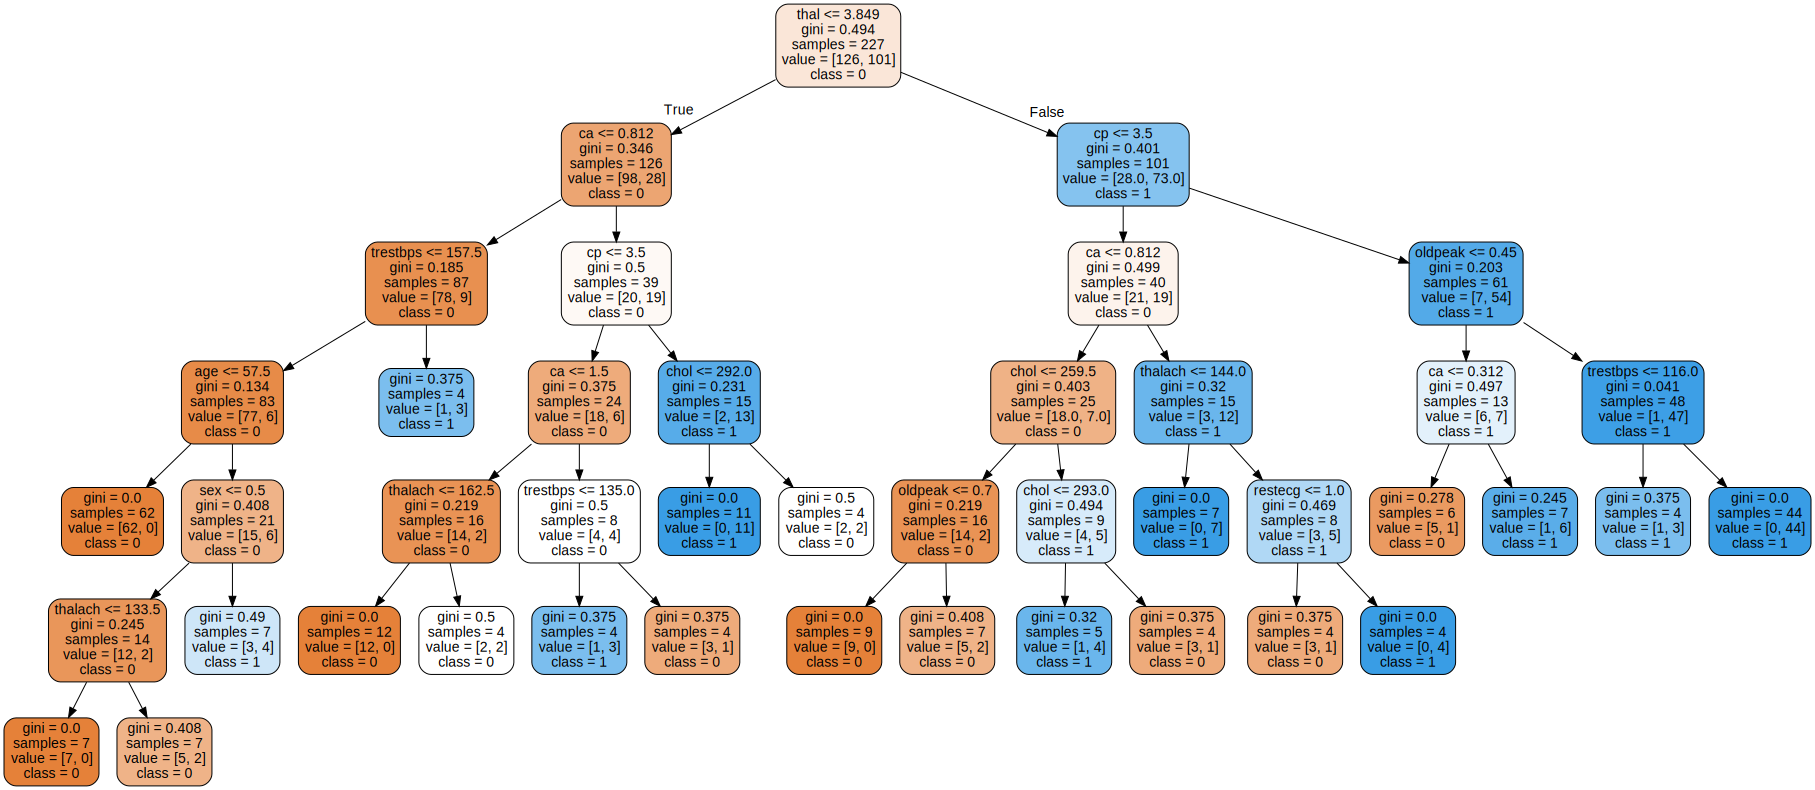

In [121]:
plot_data_best_dt = export_graphviz(grid_search_dt.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph_best_dt = graphviz.Source(plot_data_best_dt)
graph_best_dt



ตอบ

1.  **โมเดลใดมีประสิทธิภาพดีที่สุดในแง่ของ f1_macro และ accuracy บนชุดทดสอบ?**
    โมเดล Bagged Decision Trees มีประสิทธิภาพดีที่สุดบนชุดทดสอบ โดยมีคะแนน f1_macro อยู่ที่ 0.78 และ accuracy อยู่ที่ 0.79 โมเดล Random Forest มีประสิทธิภาพใกล้เคียงกัน โดยมี f1_macro อยู่ที่ 0.7821 และ accuracy อยู่ที่ 0.7895 ในขณะที่โมเดล Decision Tree มี f1_macro อยู่ที่ 0.75 และ accuracy อยู่ที่ 0.76

2.  **ไฮเปอร์พารามิเตอร์ที่เหมาะสมที่สุดสำหรับแต่ละตัวจำแนกประเภทคืออะไร?**
    *   **Decision Tree:** `max_depth` (ความลึกสูงสุดของต้นไม้): 9, `min_samples_leaf` (จำนวนตัวอย่างขั้นต่ำที่โหนดใบ): 4, `min_samples_split` (จำนวนตัวอย่างขั้นต่ำในการแยกโหนด): 2, `criterion` (เกณฑ์การแยก): 'entropy'
    *   **Bagged Decision Trees:** `estimator__max_depth` (ความลึกสูงสุดของ Decision Tree ในฐานะตัวประมาณ): 7, `max_features` (สัดส่วนของคุณสมบัติที่สุ่มมา): 0.7, `max_samples` (สัดส่วนของตัวอย่างที่สุ่มมา): 0.7, `n_estimators` (จำนวนตัวประมาณ): 200
    *   **Random Forest:** `max_depth` (ความลึกสูงสุดของต้นไม้): 10, `max_features` (จำนวนคุณสมบัติที่พิจารณา): 0.7, `min_samples_leaf` (จำนวนตัวอย่างขั้นต่ำที่โหนดใบ): 1, `n_estimators` (จำนวนต้นไม้ในป่า): 100

